<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72200 entries, 0 to 72199
Data columns (total 83 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   object               72200 non-null  object        
 1   id                   72200 non-null  object        
 2   oracle_id            72195 non-null  object        
 3   multiverse_ids       72200 non-null  object        
 4   mtgo_id              37758 non-null  float64       
 5   mtgo_foil_id         24259 non-null  float64       
 6   tcgplayer_id         61432 non-null  float64       
 7   cardmarket_id        60039 non-null  float64       
 8   name                 72200 non-null  object        
 9   lang                 72200 non-null  object        
 10  released_at          72200 non-null  datetime64[ns]
 11  uri                  72200 non-null  object        
 12  scryfall_uri         72200 non-null  object        
 13  layout               72200 non-

Text(0, 0.5, 'price (USD)')

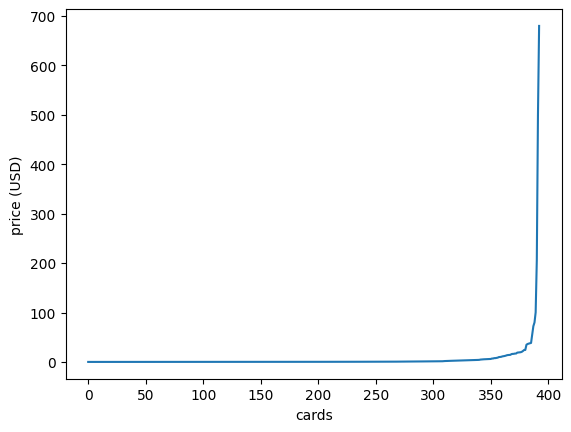

In [11]:
#Use Bokeh to graph the cards! Interactive graph!
#Analysis by format and combine into one graphic to help guage format popularity

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read in our card database json
df = pd.read_json('default-cards-20220912210801.json')

df.info()

#create dummy arrays to hold data for sorting / merging
name_list = df['name'].copy()
price_list = df['prices'].copy()

#array to hold the sorted name and price data
price_array = [0] * 500

#for loop to extract the first entry from each dictionary in the price_list
for i in range(0, 500):
    #get the usd price of each card
    first_pair = list(price_list[i].items())[0]
    
    #add the price to the second [i][1] index of our name_price_array
    price_array[i] = first_pair[1]

#for loop to extract first 500 names in name_list array
sortable_names = [''] * 500
for i in range(0, 500):
    sortable_names[i] = name_list[i]

#numpify our arrays to add them to a dataframe
nump_names = np.asarray(sortable_names)
nump_prices = np.asarray(price_array)

#create our dataframe
name_price = pd.DataFrame(nump_names)

#add a column
name_price['price'] = nump_prices

#convert price column to floats
name_price.price = name_price.price.astype(float)

#find list of ascending values for nice graph
name_price = name_price.sort_values('price')
temp_ascending = np.asarray(name_price['price'])

#print(name_price)

#sort via price column
name_price = name_price.sort_values('price', ascending=False)

#print(name_price)

name_price = name_price.dropna()

temp_prices = np.asarray(name_price['price'])

plt.plot(temp_ascending)
plt.xlabel('cards')
plt.ylabel('price (USD)')